$\textbf{No Free Lunch:  Does the RMB Follow the SGD?}$

This is an exercise in the "No Free Lunch" warning.  
I want to evaluate how closely the RMB following the US dollar.  

- We need to use a numeraire currency.  
- Chinese said that they do not have the Swiff Franc in their "basket"
- So we set the RMB/CHF rate as the dependent variable 
- For regressors we take the values of the USD, Korean Wan, Japanese Yen, Euro and the UK Sterling against the CHF
- We calculate these rates from artibrate or as cross rates from their respective values against the US Dollar

- We do a regression below, for the data set since 2004, and find that the Dollar/CHF rate has the strongest effect on the RMB/CHF movements, followed by the Sterling and Korean Won.  Not so much the Euro, surprisingly.

- However when I add in the Singapore Dollar against the CHF, it has strong effects.
- Does this make sense? Should any of you go to the IMF or AMRO or the investment banking community and tell the leaders that the SMD has a strong effect on the movements of the RMB?

- Again this is a case of "knowing the data": the SGD is tied to the USD so that their is multicollinearity.

- This also looks very nice, but is that the end of the story?

- These day are infected with autocorrelation at the weekly and daily level.

- The autocorrelations can be of longer duration.  

- Durbin-Watson is elementary, only first order (pardon the pun, my dear Watson)

- This is the acclaimed DW stat:


$DW = \frac{\sum_{t=2}^{n} \left(\hat{e}_t - \hat{e}_{t-1}\right)^2}{\sum_{t=1}^{n} \hat{e}_t^2}$

- The Ljung-Box Q Stat has the following expression:  


$Q(h) = n(n+2) \sum_{k=1}^{h} \frac{\hat{\rho}_k^2}{n-k}$

where $\rho_k$ is the sample autocorrelation at lag k for k= 1,....h.  The Q statisic under the null of zero autocorrelation is disbributed as a  Chi-square distribution with h degrees for freedom:

$Q(h) \sim \chi^2_h$




- We first read in the data from Yahoo, loading in with Pandas

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

# Define a list of currency pairs you want to retrieve
currency_pairs = [
    "CNY=X",  # Chinese Yuan (RMB) to USD
    "USDJPY=X",  # USD to Japanese Yen
    "USDKRW=X",  # USD to Korean Won
    "EURUSD=X",  # Euro to USD
   # "USDBTH=X",  # USD to Thai Baht
    "USDSGD=X",  # USD to Singapore Dollar
    "USDMYR=X",  # USD to Malaysian Ringgit
    "GBPUSD=X",  # British Pound to USD
    "EURCHF=X",  # Euro to Swiss Franc
  #  "AUDUSD=X",  # USD to Australian Dollar
   # "USDAUD=X",  # Australian Dollar to USD (cross rate)
    "USDCHF=X",  # USD to Swiss Franc
    "CHFUSD=X",  # Swiss Franc to USD (cross rate)
]

# Define a function to download exchange rate data
def download_exchange_rates(currency_pairs, start_date, end_date):
    data = yf.download(currency_pairs, start=start_date, end=end_date)
    return data["Adj Close"]

# Specify the date range for the exchange rate data
start_date = "2004-01-02"
end_date = "2023-10-01"

# Download the exchange rate data
exchange_rate_data = download_exchange_rates(currency_pairs, start_date, end_date)

# Print the first few rows of the data
#print(exchange_rate_data.head())
#exchange_rate_data_clean = exchange_rate_data.dropna(axis=1)

# Print the cleaned DataFrame
#print(exchange_rate_data_clean.head())


[*********************100%%**********************]  10 of 10 completed


In [2]:
print(exchange_rate_data.head())

            CHFUSD=X     CNY=X  EURCHF=X  EURUSD=X  GBPUSD=X  USDCHF=X  \
Date                                                                     
2004-01-02  0.806452  8.266900    1.5585  1.258194  1.793690    1.2400   
2004-01-05  0.811688  8.267000    1.5630  1.268698  1.807207    1.2320   
2004-01-06  0.811754  8.267100    1.5670  1.272103  1.821295    1.2319   
2004-01-07  0.806777  8.267201    1.5670  1.264095  1.817785    1.2395   
2004-01-08  0.815262  8.267201    1.5666  1.277498  1.833887    1.2266   

              USDJPY=X     USDKRW=X  USDMYR=X  USDSGD=X  
Date                                                     
2004-01-02  106.910004  1195.800049    3.8019    1.7018  
2004-01-05  106.239998  1178.900024    3.7972    1.6975  
2004-01-06  106.230003  1189.400024    3.7950    1.6973  
2004-01-07  106.180000  1176.800049    3.8052    1.6962  
2004-01-08  106.169998  1171.000000    3.7988    1.6935  


- It is good to fill in any NaN's or missing values

In [3]:
exchange_rate_data_filled = exchange_rate_data.fillna(method='ffill')

In [4]:
exdata = exchange_rate_data_filled
print(exdata.columns)

Index(['CHFUSD=X', 'CNY=X', 'EURCHF=X', 'EURUSD=X', 'GBPUSD=X', 'USDCHF=X',
       'USDJPY=X', 'USDKRW=X', 'USDMYR=X', 'USDSGD=X'],
      dtype='object')


In [5]:

CNY = exdata['CNY=X']
exdata['CHFEUR'] = 1 / exdata['EURCHF=X']
exdata['MYRUSD'] = exdata['USDMYR=X']
exdata['SGDUSD'] = 1/exdata['USDSGD=X']
exdata['USDCHF'] = 1/exdata['USDCHF=X']
exdata['CNCHF'] = exdata['CNY=X']*exdata['USDCHF']  # rmb to swiss frank
exdata['JPYCHF'] = exdata['USDJPY=X'] * exdata['USDCHF']
exdata['KRWCHF'] = exdata['USDKRW=X'] * exdata['USDCHF']
exdata['EURCHF'] = 1/exdata['EURCHF=X'] 
exdata['GBPCHF'] = 1/exdata['GBPUSD=X'] * exdata['USDCHF']
exdata['SGDCHF']=  exdata['USDSGD=X'] * exdata['USDCHF']



- We plot out the series, one in particular

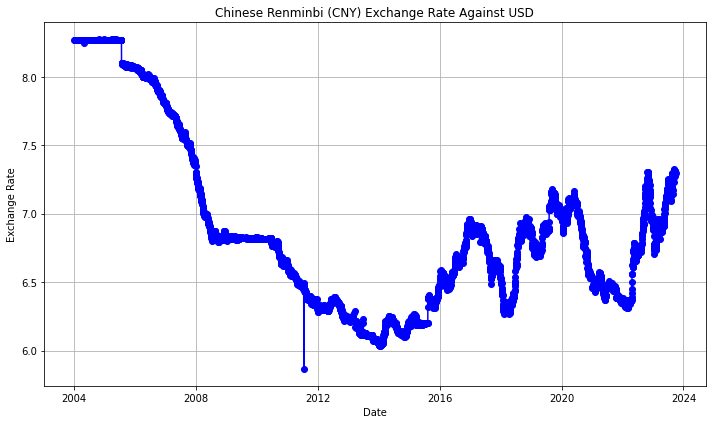

In [6]:
import matplotlib.pyplot as plt
df = pd.DataFrame(CNY)

# Convert the 'Date' column to a datetime format
#df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index of the DataFrame
#df.set_index('Date', inplace=True)

# Plot the CNY to USD exchange rate
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CNY=X'], marker='o', linestyle='-', color='b')
plt.title('Chinese Renminbi (CNY) Exchange Rate Against USD')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

- We correct it with a threadhold factor

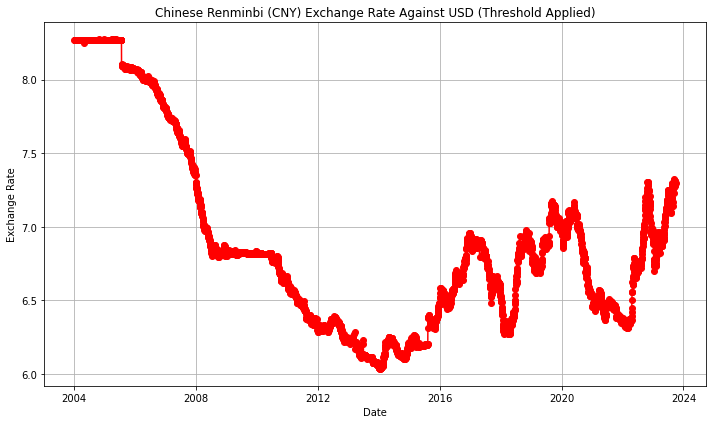

In [7]:
threshold = 6.0  # Define the threshold value

# Identify rows where 'CNY=X' is below the threshold
mask = df['CNY=X'] < threshold

# Replace values below the threshold with the previous value
df.loc[mask, 'CNY=X'] = df.loc[mask, 'CNY=X'].shift(1)

# Plot the updated DataFrame
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CNY=X'], marker='o', linestyle='-', color='r')
plt.title('Chinese Renminbi (CNY) Exchange Rate Against USD (Threshold Applied)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

- We examine our X and Y variables

In [8]:

Y = exdata['CNCHF']
X = exdata[['USDCHF', 'JPYCHF', 'KRWCHF', 'EURCHF','GBPCHF','SGDCHF']]
X = X.replace(0, np.nan)
Y = Y.replace(0, np.nan)
X1 = X.fillna(method='ffill')
Y1 = Y.fillna(method='ffill')

X1 = X1.replace(0, np.nan).fillna(method='ffill')
Y1 = Y1.replace(0, np.nan).fillna(method='ffill')



Text(0.5, 1.0, 'Weekly Rate of Change of Regressors')

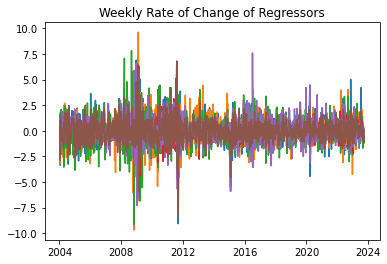

In [9]:
import matplotlib.pyplot as plt
X1 = pd.DataFrame(X1)
Y1 = pd.DataFrame(Y1)

Date_daily = X1.index


# Calculate log first differences for X1 and Y1 if needed


X = X.replace(0, np.nan)
Y = Y.replace(0, np.nan)
X1 = X.fillna(method='ffill')
Y1 = Y.fillna(method='ffill')

X1 = X1.replace(0, np.nan).fillna(method='ffill')
Y1 = Y1.replace(0, np.nan).fillna(method='ffill')
X1 = pd.DataFrame(X1)
Y1 = pd.DataFrame(Y1)
X1_weekly = X1.resample('W').last()
Y1_weekly = Y1.resample('W').last()
Date_week = X1_weekly.index  # Get the end-of-week dates


# Calculate log first differences for X1 and Y1 if needed
X1diff = X1.pct_change() * 100 
Y1diff = Y1.pct_change() * 100 

X1_weekly_diff = X1_weekly.pct_change() * 100
Y1_weekly_diff = Y1_weekly.pct_change() * 100

X1diff = X1diff.where((X1diff.abs() <= 10), X1diff.shift(1))
Y1diff = Y1diff.where((Y1diff.abs() <= 10), Y1diff.shift(1))

X1_weekly_diff = X1_weekly_diff.where((X1_weekly_diff.abs() <= 10), X1_weekly_diff.shift(1))
Y1_weekly_diff = Y1_weekly_diff.where((Y1_weekly_diff.abs() <= 10), Y1_weekly_diff.shift(1))



plt.plot(Date_week, X1_weekly_diff)
plt.title("Weekly Rate of Change of Regressors")










Text(0.5, 1.0, 'Daily Rate of Change of USDC-CHF')

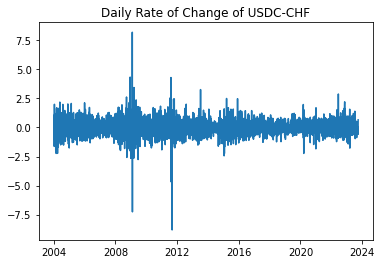

In [10]:
plt.plot(Date_daily, X1diff.iloc[:,0])
plt.title("Daily Rate of Change of USDC-CHF")

0.004485765162395867


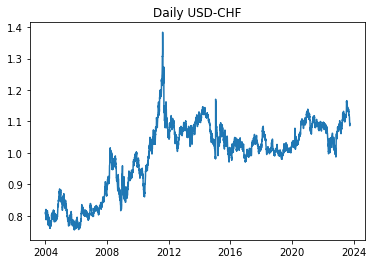

In [11]:
plt.plot(Date_daily, X1.iloc[:,0])
plt.title("Daily USD-CHF")
print(np.mean(X1diff.iloc[:,0]))

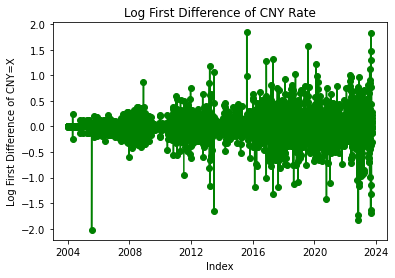

In [12]:
import numpy as np
import matplotlib.pyplot as plt



# Assuming df is your DataFrame with the 'CNY=X' column
# Take the logarithm of the 'CNY=X' column
df['log_CNY=X'] = np.log(df['CNY=X'])

# Calculate the first difference of the log-transformed data
df['log_first_diff'] = df['log_CNY=X'].diff() * 100

# Remove the first observation (index 0)
df = df.iloc[1:]

# Plot the resulting data
plt.plot(df.index, df['log_first_diff'], marker='o', linestyle='-', color='g')
plt.xlabel('Index')
plt.ylabel('Log First Difference of CNY=X')
plt.title('Log First Difference of CNY Rate')
plt.show()


In [13]:
import statsmodels.api as sm
Y1diff = Y1diff[1:]
X1diff = X1diff[1:]


Text(0.5, 1.0, 'RMB-CHF Daily Spot Rate')

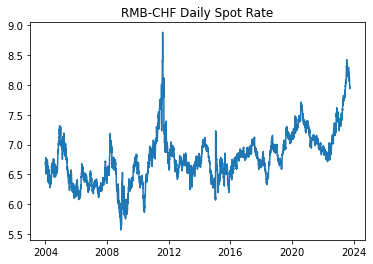

In [14]:
plt.plot(Date_daily,Y1)
plt.title('RMB-CHF Daily Spot Rate')

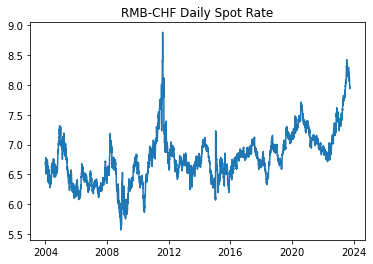

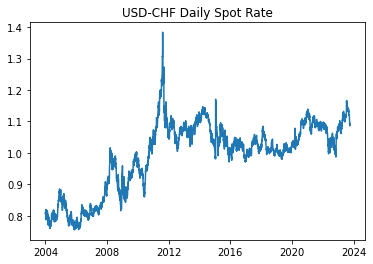

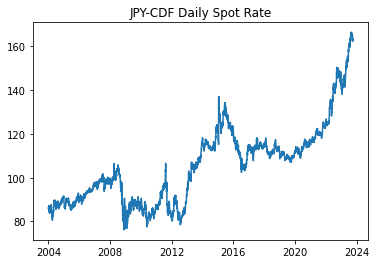

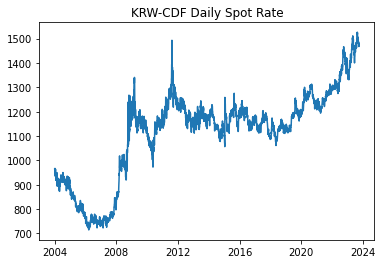

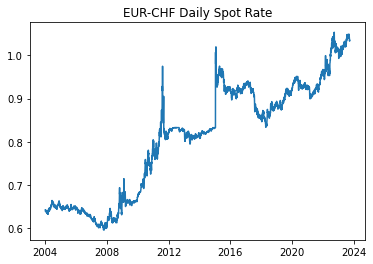

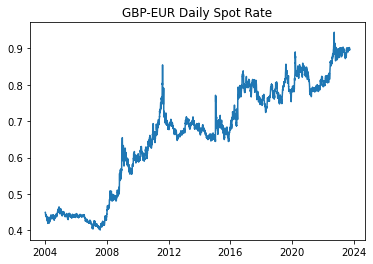

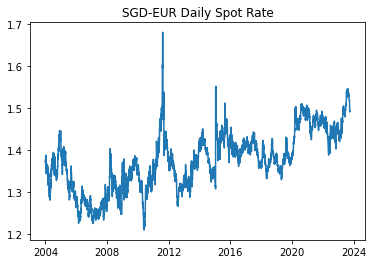

In [15]:


plt.figure()
plt.plot(Date_daily, Y1)
plt.title('RMB-CHF Daily Spot Rate')

# Create a subplot below the first plot
plt.figure()  # Create a new figure
plt.plot(Date_daily, X1.iloc[:, 0])  # Replace X with your data
plt.title('USD-CHF Daily Spot Rate')
plt.figure()
plt.plot(Date_daily, X1.iloc[:,1])
plt.title('JPY-CDF Daily Spot Rate')
plt.figure()
plt.plot(Date_daily, X1.iloc[:,2])
plt.title('KRW-CDF Daily Spot Rate')
plt.figure()
plt.plot(Date_daily, X1.iloc[:,3])
plt.title('EUR-CHF Daily Spot Rate')
plt.figure()
plt.plot(Date_daily, X1.iloc[:,4])
plt.title('GBP-EUR Daily Spot Rate')
plt.figure()
plt.plot(Date_daily, X1.iloc[:,5])
plt.title('SGD-EUR Daily Spot Rate')

# Display the plots
plt.show()

In [27]:

X1 = X1.iloc[:,1:]

In [29]:
import statsmodels.api as sm  # Import the statsmodels library


#Y1diff = Y1diff[1:]
#X1diff = X1diff[1:]


X1log = np.log(X1)
X1log = sm.add_constant(X1log)

model0 = sm.OLS(Y1log, X1log).fit()

# Print the regression summary
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:                  CNCHF   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2046.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:53:15   Log-Likelihood:                 10109.
No. Observations:                5151   AIC:                        -2.020e+04
Df Residuals:                    5144   BIC:                        -2.016e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8665      0.063     45.828      0.0

C:\Users\ApostlePaul1906\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0.5, 1.0, 'Residuals from OLS Regression in Levels')

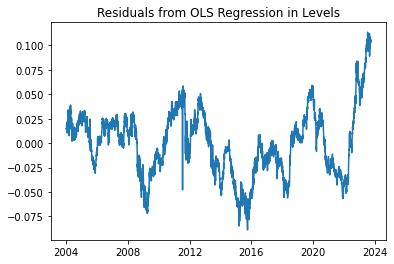

In [30]:
residuals0 = model0.resid
plt.plot(Date_daily, residuals0)
plt.title('Residuals from OLS Regression in Levels')

In [31]:
import statsmodels.api as sm

sm.stats.acorr_ljungbox(residuals0, lags=[10], return_df=True)
     

,lb_stat,lb_pvalue
10,49206.178656,0.0


In [39]:
import statsmodels.api as sm  # Import the statsmodels library


#Y1diff = Y1diff[1:]
#X1diff = X1diff[1:]
X1diff = X1.pct_change() * 100 
Y1diff = Y1.pct_change() * 100 

X1diff = X1diff[1:]
Y1diff = Y1diff[1:]

X1diff = sm.add_constant(X1diff)  # Adding a cons
model = sm.OLS(Y1diff[1:], X1diff[1:]).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  CNCHF   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     4650.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:03:16   Log-Likelihood:                -783.25
No. Observations:                5149   AIC:                             1581.
Df Residuals:                    5142   BIC:                             1626.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.004     -0.447      0.6

C:\Users\ApostlePaul1906\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Text(0.5, 1.0, 'Regression Residuals')

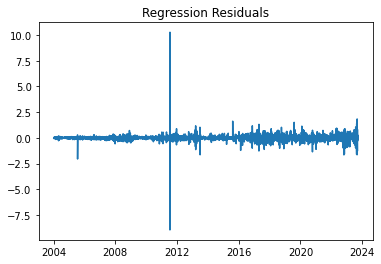

In [41]:

residuals = model.resid
plt.plot(Date_daily[2:], residuals)
plt.title('Regression Residuals')

In [34]:

import statsmodels.api as sm

sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
     

,lb_stat,lb_pvalue
10,455.630828,1.314628e-91


Let's take out  Singapore, it is collinear with the Dollar

In [43]:


X1diff2 = X1diff.iloc[:,:-1]



model1 = sm.OLS(Y1diff, X1diff2).fit()

# Print the regression summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  CNCHF   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     5508.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:06:26   Log-Likelihood:                -812.48
No. Observations:                5150   AIC:                             1637.
Df Residuals:                    5144   BIC:                             1676.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.004     -0.666      0.5

Text(0.5, 1.0, 'Residuals of Log First Difference, wo Singapore')

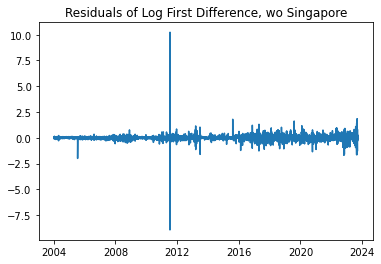

In [44]:
residuals1= model1.resid
plt.plot(Date_daily[1:],residuals1)
plt.title('Residuals of Log First Difference, wo Singapore')

In [206]:
print(X1_weekly_diff.shape)
print(Y1_weekly_diff.shape)

(1031, 6)
(1031, 1)


In [45]:
X1_weekly_diff = X1_weekly_diff.dropna()
Y1_weekly_diff = Y1_weekly_diff.dropna()
X1_weekly_diff = X1_weekly_diff.iloc[:,:-1]


In [46]:
X1_weekly_diff = sm.add_constant(X1_weekly_diff)
model1 = sm.OLS(Y1_weekly_diff, X1_weekly_diff).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  CNCHF   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     2015.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:07:04   Log-Likelihood:                -522.03
No. Observations:                1030   AIC:                             1056.
Df Residuals:                    1024   BIC:                             1086.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0162      0.013     -1.287      0.1

In [47]:
residuals1 = model1.resid
sm.stats.acorr_ljungbox(residuals1, lags=[10], return_df=True)
     

,lb_stat,lb_pvalue
10,49.418909,3.412844e-07


Text(0.5, 1.0, 'Residuals from Weekly First Differences')

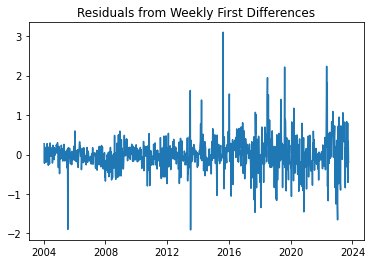

In [48]:
plt.plot(Date_week[1:], residuals1)
plt.title('Residuals from Weekly First Differences')

In [49]:
sm.stats.acorr_ljungbox(residuals1, lags=[10], return_df=True)
     

,lb_stat,lb_pvalue
10,49.418909,3.412844e-07


In [59]:
YY = Y1_weekly_diff.iloc[1:]
XX = X1_weekly_diff.iloc[1:,:]

YYlag = Y1_weekly_diff.iloc[:-1]
XX.index = range(len(XX))  # Reset the indices of XX
YYlag.index = range(len(YYlag))  # Reset the indices of YYlag

In [60]:
XXX = pd.concat([XX,YYlag], axis=1)

print((XX.shape))
print(YY.shape)
print(YYlag.shape)
print(XXX.shape)





(1029, 6)
(1029, 1)
(1029, 1)
(1029, 7)


In [62]:
#YY = YY.dropna()
#XX1 = XX1.dropna()
XXX.reset_index(drop=True, inplace=True)
YY.reset_index(drop=True, inplace=True)
# Perform the regression

model2 = sm.OLS(YY, XXX).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  CNCHF   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1675.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:17:53   Log-Likelihood:                -521.54
No. Observations:                1029   AIC:                             1057.
Df Residuals:                    1022   BIC:                             1092.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0164      0.013     -1.303      0.1

In [63]:
residuals2 = model2.resid

In [70]:
sm.stats.acorr_ljungbox(residuals2, lags=[4], return_df=True)

,lb_stat,lb_pvalue
4,37.05958,1.751104e-07


Text(0.5, 1.0, 'Residuals with Lagged Y')

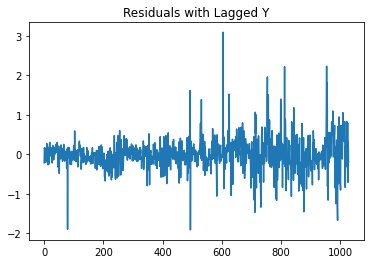

In [65]:
plt.plot(residuals2)
plt.title('Residuals with Lagged Y')



$\section{Newey-West Autocorrelation Correction}$

The Newey-West correction is a method used in econometrics to address the issue of autocorrelation in regression analysis. Autocorrelation, or serial correlation, occurs when the errors in a regression model are correlated with each other, which violates one of the key assumptions of ordinary least squares (OLS) regression.

$\subsection{How Newey-West Correction Works}$

The Newey-West correction adjusts the standard errors of the estimated coefficients in a regression model to account for both heteroskedasticity and autocorrelation. This correction makes the standard errors robust, meaning they are more reliable in the presence of these issues.

The key idea behind the Newey-West correction is to introduce lagged values of the residuals into the computation of the standard errors. By including these lagged residuals, the correction takes into account the autocorrelation structure. The formula for the Newey-West standard errors is as follows:

$
\text{SE}_{NW} = \sqrt{\frac{1}{n} \sum_{k=-p}^{p} \left(1 - \frac{|k|}{p + 1}\right) \hat{\rho}_k \hat{\sigma}^2}
$

Where:
- $n$ is the number of observations.
- $p$ is the number of lags used in the correction.
- $\hat{\rho}_k$ represents the sample autocorrelation of the residuals at lag $k$.
- $\hat{\sigma}^2$ is the estimated variance of the residuals.


Choosing the appropriate number of lags, $p$, is a crucial step in applying the Newey-West correction. The choice of $p$ depends on the data and should be guided by statistical tests or prior knowledge of the autocorrelation structure. 

Common approaches for selecting $p$ include:
- Conducting diagnostic tests such as the Ljung-Box test to assess autocorrelation in the residuals for different lag orders.
- Using subject-matter expertise to determine the plausible range of lag orders.
- Applying model selection criteria, such as the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC), to identify the most appropriate number of lags.

It's important to select a value for $p$ that adequately captures the autocorrelation in the data without overcomplicating the correction. An insufficient number of lags may lead to an inadequate correction, while too many lags can introduce inefficiency into the standard errors.



In [119]:
import statsmodels.api as sm
lag_order =  300

# Perform the regression
model3 = sm.OLS(YY, XX).fit(cov_type='HAC', cov_kwds={'maxlags': lag_order})

print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                  CNCHF   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     8115.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:08:23   Log-Likelihood:                -521.79
No. Observations:                1029   AIC:                             1056.
Df Residuals:                    1023   BIC:                             1085.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0165      0.020     -0.826      0.4

In [122]:
residuals_nw= model3.resid
sm.stats.acorr_ljungbox(residuals_nw, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,49.303132,3.583936e-07


$\textbf{Chow Test: Evidence of Structural Chnage?}$

Here is the formula for the Chow test: 

$ ChowStat = \frac{{(RSS - (RSS1 + RSS2)) / k}}{{(RSS1 + RSS2) / (N - 2k)}} $


In [89]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd

def chow(y, X, breakpoint_value):
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    y1 = y.iloc[:breakpoint_value]
    y2 = y.iloc[breakpoint_value:]
    x1 = X.iloc[:breakpoint_value, :]
    x2 = X.iloc[breakpoint_value:, :]
    N, k = X.shape

    model = sm.OLS(y, X).fit()
    RSS = model.ssr
    model1 = sm.OLS(y1, x1).fit()
    RSS1 = model1.ssr
    model2 = sm.OLS(y2, x2).fit()
    RSS2 = model2.ssr
    ChowStat = ((RSS - (RSS1 + RSS2)) / k) / ((RSS1 + RSS2) / (N - 2 * k))
    
    # Calculate the p-value for the Chow test using the F-distribution
    J = k  # Number of regressions in the Chow test
    N1 = len(y1)
    N2 = len(y2)
    ChowPval = 1 - stats.f.cdf(ChowStat, J, N1 + N2 - 2 * k)
    
    return ChowStat, ChowPval



In [90]:
import math
breakpoint_value = math.ceil(.5* len(YY))

ChowStat, ChowPval = chow(YY,XX1, breakpoint_value)


In [91]:
print(ChowPval)

0.07182005799607971


In [92]:
print(XX1)

      const    USDCHF    JPYCHF    KRWCHF    EURCHF    GBPCHF     CNCHF
0       1.0  1.539471  1.226047  0.308226 -0.485279 -1.449289  1.540701
1       1.0 -3.363141 -3.209003 -2.921400 -0.095688 -0.727110 -3.366653
2       1.0  1.796359  1.796359  0.809877  0.243000  0.193951  1.801292
3       1.0 -0.886232 -1.842551 -2.168162 -0.216945 -0.750361 -0.889833
4       1.0  1.425221  1.166186  2.063505 -0.057396  0.205214  1.431353
...     ...       ...       ...       ...       ...       ...       ...
1024    1.0 -0.775056 -0.534680 -1.698331 -0.091018  0.464779 -0.828203
1025    1.0  0.215129 -0.192405  0.065558 -0.188986 -0.417135 -0.054816
1026    1.0 -1.060861  0.202793 -0.360256  0.291114  0.507688 -0.094225
1027    1.0 -0.416109 -0.314044 -0.935666  0.193054  0.171519 -1.121422
1028    1.0 -0.892241 -0.783375  0.161524 -1.162486 -0.024491 -0.475426

[1029 rows x 7 columns]


$\textbf{VAR Estimation}$

In [97]:
XX2 = XX1.iloc[:,1:-1]

In [98]:
print(YY.shape)
print(XX2.shape)

(1029, 1)
(1029, 5)


In [100]:
Ymat =  pd.concat([YY, XX2], axis=1)

In [102]:
print(Ymat)

         CNCHF    USDCHF    JPYCHF    KRWCHF    EURCHF    GBPCHF
0    -3.366653  1.539471  1.226047  0.308226 -0.485279 -1.449289
1     1.801292 -3.363141 -3.209003 -2.921400 -0.095688 -0.727110
2    -0.889833  1.796359  1.796359  0.809877  0.243000  0.193951
3     1.431353 -0.886232 -1.842551 -2.168162 -0.216945 -0.750361
4    -0.326473  1.425221  1.166186  2.063505 -0.057396  0.205214
...        ...       ...       ...       ...       ...       ...
1024 -0.054816 -0.775056 -0.534680 -1.698331 -0.091018  0.464779
1025 -0.094225  0.215129 -0.192405  0.065558 -0.188986 -0.417135
1026 -1.121422 -1.060861  0.202793 -0.360256  0.291114  0.507688
1027 -0.475426 -0.416109 -0.314044 -0.935666  0.193054  0.171519
1028 -1.214195 -0.892241 -0.783375  0.161524 -1.162486 -0.024491

[1029 rows x 6 columns]


In [103]:
import pandas as pd
import statsmodels.api as sm

# Load your weekly time series data into a DataFrame (Ymat).
# Make sure the DataFrame has the data for all the variables you want to include in the VAR analysis.

# Create a VAR model with four lags
model = sm.tsa.VAR(Ymat)
results = model.fit(4)  # Specify the number of lags (four in your case)

# Print the VAR summary and analyze the results
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, Oct, 2023
Time:                     19:08:56
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                  0.0168489
Nobs:                     1025.00    HQIC:                 -0.430959
Log likelihood:          -8215.17    FPE:                   0.494151
AIC:                    -0.704973    Det(Omega_mle):        0.427629
--------------------------------------------------------------------
Results for equation CNCHF
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.004762         0.040910            0.116           0.907
L1.CNCHF         -0.010444         0.031374           -0.333           0.739
L1.USDCHF        -0.051668         0.095552           -0.541           0.589

$\textbf{Granger Causality}$

The Null hypothesis for grangercausalitytests is that the time series in
the second column, x2, does NOT Granger cause the time series in the first
column, x1. Grange causality means that past values of x2 have a
statistically significant effect on the current value of x1, taking past
values of x1 into account as regressors. We reject the null hypothesis
that x2 does not Granger cause x1 if the pvalues are below a desired size
of the test.

The null hypothesis for all four test is that the coefficients
corresponding to past values of the second time series are zero.

`params_ftest`, `ssr_ftest` are based on F distribution

`ssr_chi2test`, `lrtest` are based on chi-square distribution


In [105]:
from statsmodels.tsa.stattools import grangercausalitytests

# Perform Granger causality test from Variable1 to Variable2
max_lag = 4  # Adjust the maximum lag order as needed
test_result = grangercausalitytests(Ymat[['CNCHF', 'USDCHF']], max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1995  , p=0.6552  , df_denom=1025, df_num=1
ssr based chi2 test:   chi2=0.2001  , p=0.6546  , df=1
likelihood ratio test: chi2=0.2001  , p=0.6546  , df=1
parameter F test:         F=0.1995  , p=0.6552  , df_denom=1025, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7981  , p=0.4505  , df_denom=1022, df_num=2
ssr based chi2 test:   chi2=1.6040  , p=0.4484  , df=2
likelihood ratio test: chi2=1.6028  , p=0.4487  , df=2
parameter F test:         F=0.7981  , p=0.4505  , df_denom=1022, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0286  , p=0.3791  , df_denom=1019, df_num=3
ssr based chi2 test:   chi2=3.1069  , p=0.3754  , df=3
likelihood ratio test: chi2=3.1022  , p=0.3761  , df=3
parameter F test:         F=1.0286  , p=0.3791  , df_denom=1019, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6304  , p=0.

We see above that there is evidence that the second-variable USDCHF granger-causes CNCHF.   Lets try the reverse

In [106]:
from statsmodels.tsa.stattools import grangercausalitytests

# Perform Granger causality test from Variable1 to Variable2
max_lag = 4  # Adjust the maximum lag order as needed
test_result = grangercausalitytests(Ymat[['USDCHF', 'CNCHF']], max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9297.3477, p=0.0000  , df_denom=1025, df_num=1
ssr based chi2 test:   chi2=9324.5594, p=0.0000  , df=1
likelihood ratio test: chi2=2374.2879, p=0.0000  , df=1
parameter F test:         F=9297.3477, p=0.0000  , df_denom=1025, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4640.8699, p=0.0000  , df_denom=1022, df_num=2
ssr based chi2 test:   chi2=9327.1495, p=0.0000  , df=2
likelihood ratio test: chi2=2373.1356, p=0.0000  , df=2
parameter F test:         F=4640.8699, p=0.0000  , df_denom=1022, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3100.1341, p=0.0000  , df_denom=1019, df_num=3
ssr based chi2 test:   chi2=9364.2913, p=0.0000  , df=3
likelihood ratio test: chi2=2375.3994, p=0.0000  , df=3
parameter F test:         F=3100.1341, p=0.0000  , df_denom=1019, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=23

In [108]:
Var_residuals = results.resid

In [110]:
print(Var_residuals.shape)

(1025, 6)


In [111]:
print(Date_week.shape)

(1031,)


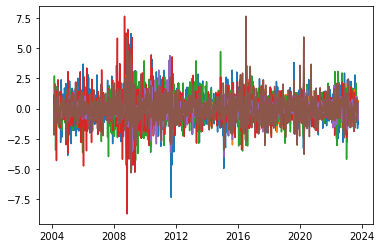

In [113]:
plt.plot(Date_week[6:], Var_residuals)

In [114]:
nymat, cymat = Ymat.shape

In [121]:
import statsmodels.api as sm

# Assuming Var_residuals is a DataFrame with residuals for each variable
Q_stats = []
P_vals = []

for col in Var_residuals.columns:
    # Extract the residuals for the current column
    RESID = Var_residuals[col]

    # Calculate the Ljung-Box Q statistic with a lag of 4
    lbq_stat, p_value = sm.stats.acorr_ljungbox(RESID, lags=[4])

    # Append the Q statistic to the list
    Q_stats.append(lbq_stat[0])
    P_vals.append(p_value)

# Q_stats will now contain the Ljung-Box Q statistics for each column in Var_residuals with a lag of 4



    

C:\Users\ApostlePaul1906\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [122]:
Q_stats

[0.2122043673584994,
 6.3027960097784685,
 0.15054300230504375,
 0.19630959337398768,
 1.8288034844893968,
 0.47807939466997235]

In [123]:
P_vals


[array([0.99475391]),
 array([0.17764771]),
 array([0.99730532]),
 array([0.99548673]),
 array([0.76720858]),
 array([0.97559957])]

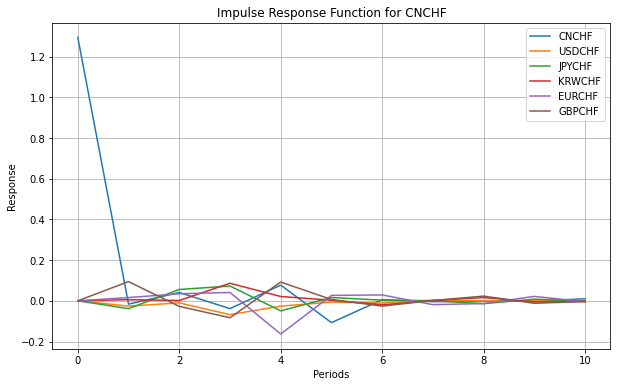

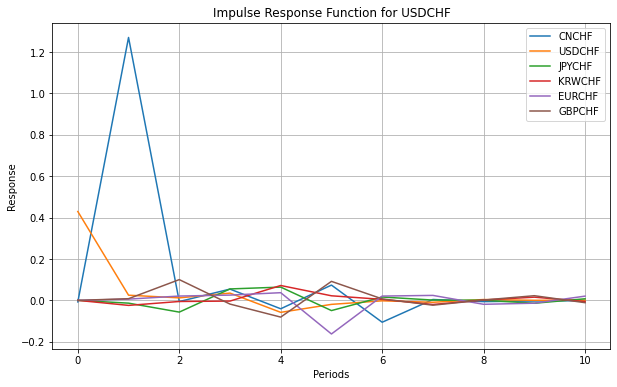

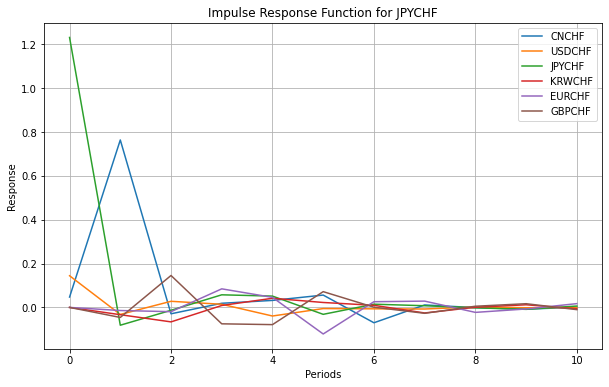

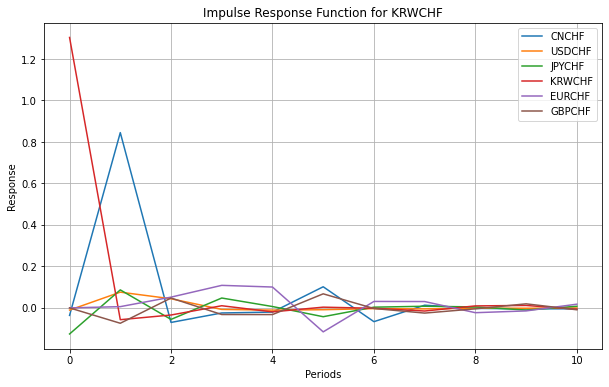

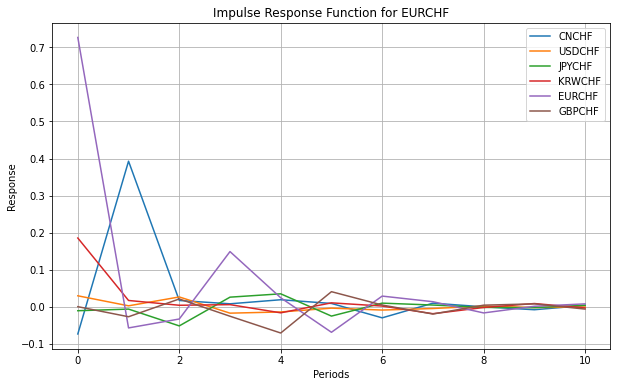

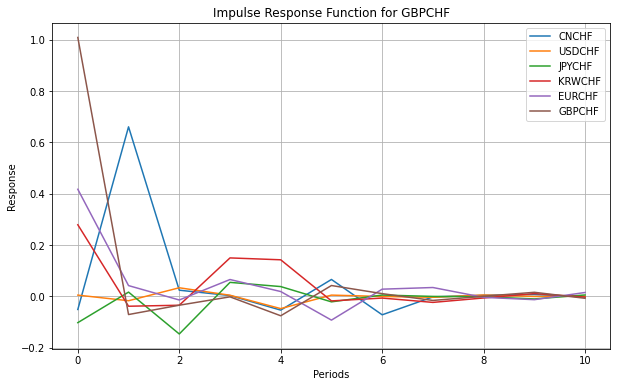

In [213]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

irf = results.irf(10)  # Adjust the number of periods (lags) you want to plot, e.g., 10

# Plot IRFs for each variable in separate figures
num_vars = len(model.endog_names)
num_subplots = 6  # Number of figures

for i in range(num_subplots):
    plt.figure(figsize=(10, 6))
    plt.title(f'Impulse Response Function for {model.endog_names[i]}')
    plt.xlabel('Periods')
    plt.ylabel('Response')
    plt.grid(True)

    plt.plot(irf.orth_irfs[:, i], label=model.endog_names[i])

    # Add a single legend for this subplot with the variable name
    plt.legend(model.endog_names, loc='upper right')

plt.show()


In [155]:
import statsmodels.api as sm


In [156]:
import statsmodels.api as sm
import statsmodels.api as sm

# Assuming you have already estimated a VAR model and stored it in 'results'
horizon = 20  # Specify the desired horizon

# Calculate the FEVD at the specified horizon using Cholesky decomposition
fevd_matrix_final_horizon = results.fevd(horizon).decomp

# Print or use the 6 by 6 FEVD matrix for the final horizon


In [151]:
print(fevd_matrix_final_horizon.shape)

(6, 20, 6)


In [160]:
fevd_matrix1 = fevd_matrix_final_horizon[:, horizon - 1, :]


In [161]:
print(fevd_matrix1)

[[0.95143002 0.00352116 0.00719394 0.00485225 0.0181358  0.01486684]
 [0.85906908 0.09989548 0.00709973 0.00368111 0.01623853 0.01401608]
 [0.26755631 0.01102002 0.68681859 0.00391908 0.01210567 0.01858033]
 [0.2902258  0.00318828 0.012149   0.6721368  0.01616623 0.0061339 ]
 [0.20835741 0.00283825 0.00709917 0.04580103 0.72420058 0.01170356]
 [0.24549717 0.00207087 0.02033638 0.06741376 0.1040227  0.56065911]]


In [164]:
row_sums = np.sum(fevd_matrix1, axis=1)

# Calculate the column sums
column_sums = np.sum(fevd_matrix1, axis=0)

In [170]:
print(row_sums)
print(column_sums)

[1. 1. 1. 1. 1. 1.]
[2.82213579 0.12253406 0.74069682 0.79780402 0.8908695  0.62595981]


VD1 = np.diag(np.diag(fevd_matrix1))

In [172]:
VD1 = np.diag(np.diag(fevd_matrix1))

In [173]:
VD2 = fevd_matrix1 - VD1

In [174]:
Outward = np.sum(VD2, axis = 0)
Inward = np.sum(VD2, axis = 1)
Net = Outward - Inward

In [175]:
Net

array([ 1.82213579, -0.87746594, -0.25930318, -0.20219598, -0.1091305 ,
       -0.37404019])

In [177]:
variable_names = results.names

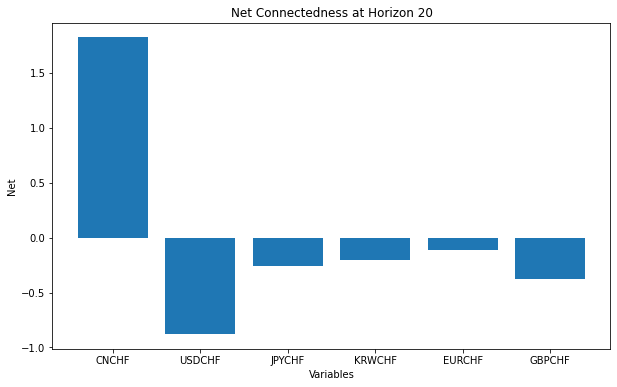

In [179]:
plt.figure(figsize=(10, 6))
plt.bar(variable_names, Net)

# Set labels and title
plt.xlabel("Variables")
plt.ylabel("Net")
plt.title("Net Connectedness at Horizon 20")

# Show the plot
plt.show()





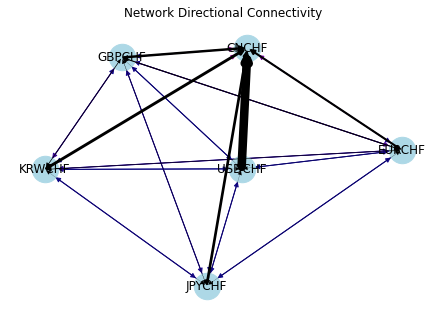

In [191]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a 5x5 random asymmetric matrix with absolute values
matrix = VD2

# Create a directed graph from the matrix
G = nx.DiGraph()

# Add nodes to the graph
num_nodes = matrix.shape[0]
G.add_nodes_from(range(num_nodes))

# Define custom node labels
node_labels = {i: variable_names[i] for i in range(len(variable_names))}

# Create a list to store arrow thickness for connections
arrow_widths = []

for i in range(num_nodes):
    for j in range(num_nodes):
        if matrix[i, j] != 0:
            G.add_edge(i, j, weight=matrix[i, j])
            # Calculate the arrow thickness based on the matrix values
            arrow_width = abs(matrix[i, j]) * 10  # Adjust the scaling factor as needed
            arrow_widths.append(arrow_width)

# Draw the directed graph with arrows and varying arrow thickness and color mapping
pos = nx.spring_layout(G, seed=42)  # Adjust the seed for reproducible layout
nx.draw(G, pos, with_labels=False, node_size=700, node_color='lightblue', font_size=8, font_weight='bold', edge_color=arrow_widths, edge_cmap=plt.cm.plasma, font_color='black')

# Create arrows for connections with varying thickness
for i, (src, dst) in enumerate(G.edges()):
    width = arrow_widths[i]
    plt.annotate("", xy=pos[dst], xytext=pos[src], arrowprops=dict(arrowstyle="-|>", lw=width, color='black'))

# Draw node labels separately with a smaller font size
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')

# Show the graph
plt.title("Network Directional Connectivity")
plt.axis('off')
plt.show()
